<!-- ### In this tutorial you will learn how to: -->
- Read an image from file (using cv::imread)
- Display an image in an OpenCV window (using cv::imshow)
- Write an image to a file (using cv::imwrite)


### Image operations

In [ ]:
import cv2 as cv
import sys

img = cv.imread(cv.samples.findFile("images/3.jpg"))

if img is None:
    sys.exit("Could not read the image.")
cv.imshow("Sokhibjon here", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("image/3.jpg", img)

### Video operations - Capture Video from Camera

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

### Video operations - Playing Video from file

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('videos/20241013_175312.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

### Video operations - Saving a video

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('videos/output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()


# Digital Image Processing project


In [5]:
import cv2
import ipywidgets as widgets
from IPython.display import display
import time


In [6]:
def select_roi(frame):
    from matplotlib import pyplot as plt

    # Display the frame using Matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title("Select ROI and press ENTER")
    plt.show()

    # Let the user select ROI
    roi = cv2.selectROI("Select ROI", frame, fromCenter=False, showCrosshair=True)
    cv2.destroyWindow("Select ROI")
    return roi


In [ ]:
def track_and_save(video_source=0, scale_factor=0.5, output_path='output.avi', time_limit=10):
    """
    Perform object tracking on a video or webcam feed and save the output.

    Args:
        video_source: Path to the video file or 0 for the webcam.
        scale_factor: Resizing scale for input frames.
        output_path: File path to save the output video.
        time_limit: Time limit (in seconds) for processing the webcam feed only.
    """
    # Initialize video capture
    cap = cv2.VideoCapture(video_source)
    if not cap.isOpened():
        print("Error: Could not open video source.")
        return

    # Read the first frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        cap.release()
        return

    # Resize the frame
    frame = cv2.resize(frame, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

    # Select ROI
    bbox = select_roi(frame)
    if bbox == (0, 0, 0, 0):
        print("Error: No ROI selected.")
        cap.release()
        return

    # Initialize CSRT tracker
    tracker = cv2.TrackerCSRT_create()
    tracker.init(frame, bbox)

    # Define the codec and create VideoWriter object
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * scale_factor)
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * scale_factor)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI files
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (frame_width, frame_height))

    # Create a display window
    display_handle = display(display_id=True)

    # Start time
    start_time = time.time()
    use_time_limit = video_source == 0  # Use time limit only for webcam

    while True:
        # Check if time limit is exceeded (only for webcam)
        if use_time_limit:
            elapsed_time = time.time() - start_time
            if elapsed_time > time_limit:
                print(f"Time limit of {time_limit} seconds reached.")
                break

        # Read a new frame
        ret, frame = cap.read()
        if not ret:
            break

        # Resize the frame
        frame = cv2.resize(frame, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

        # Update tracker
        success, bbox = tracker.update(frame)

        if success:
            # Draw bounding box
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
        else:
            # Tracking failure
            cv2.putText(frame, "Tracking failure detected", (100, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

        # Write the frame to the output video
        out.write(frame)

        # Display result
        _, img = cv2.imencode('.jpg', frame)
        display_img = widgets.Image(value=img.tobytes())
        display_handle.update(display_img)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()

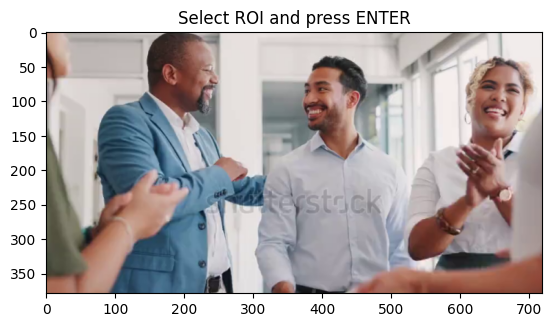

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [8]:
# track_and_save(0, scale_factor=0.5, output_path='webcam_output.avi', time_limit=10)

track_and_save('videos/1110331145-preview.mp4', scale_factor=0.8, output_path='video_output.avi', time_limit=15)
